<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [100]:
import os 
os.chdir('/gdrive/My Drive/ylm/')

In [102]:
!ls

calısma
model_fashion-mnist_cnn_train1_epoch12.h5
model_fashion-mnist_cnn_train2_epoch24.h5


In [79]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

In [80]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


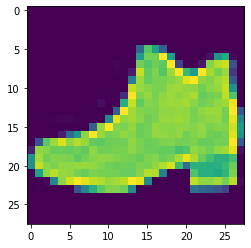

In [84]:
plt.imshow(x_train[15])


In [85]:
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

In [104]:
root = '/gdrive/My Drive/ylm/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')


1/1 [==============================] - 0s 13ms/step


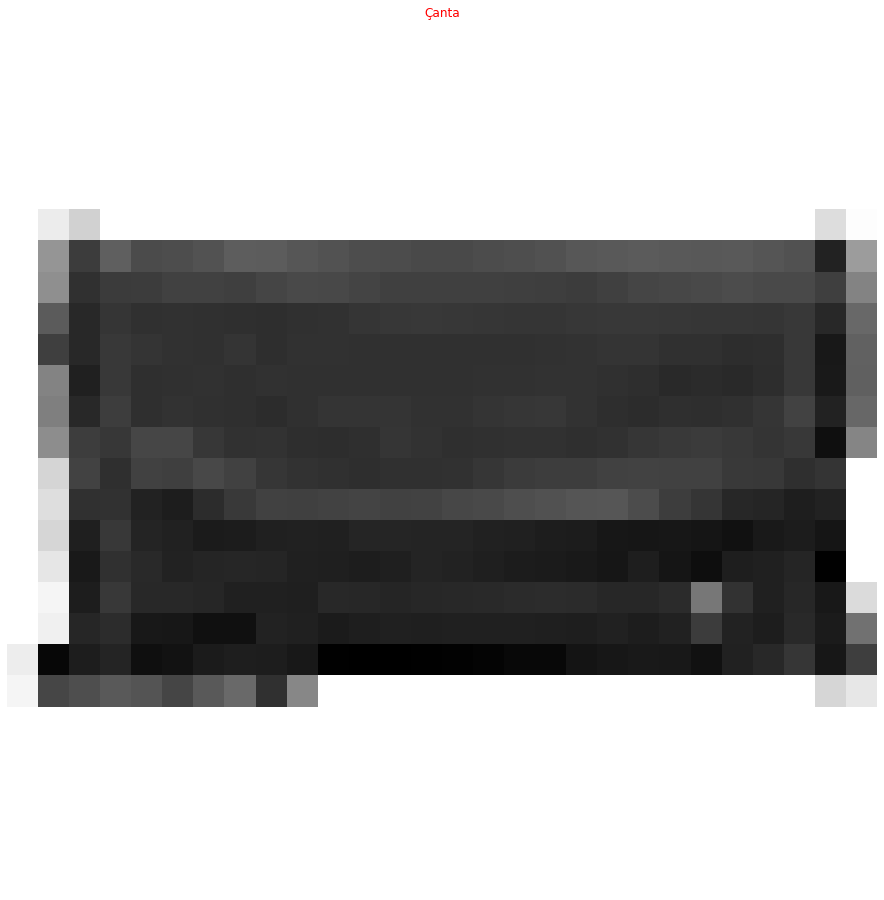

Doğru tahminlerin sayısı: 180
Hata sayısı: 20
Doğru tahmin oranı: 90.0 %


In [112]:
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')